# Part 1

*Importing the Dataset*

In [37]:
from sklearn.datasets import load_linnerud
import seaborn as sns

In [38]:
train, test = load_linnerud(return_X_y=True, as_frame=True)
print("Type Train: ", type(train), "\n", "Type Test: ", type(test))

Type Train:  <class 'pandas.core.frame.DataFrame'> 
 Type Test:  <class 'pandas.core.frame.DataFrame'>


*Statiscal Description of Train Dataset*

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chins   20 non-null     float64
 1   Situps  20 non-null     float64
 2   Jumps   20 non-null     float64
dtypes: float64(3)
memory usage: 612.0 bytes


In [40]:
train.describe()

,Chins,Situps,Jumps
count,20.000000,20.000000,20.00000
mean,9.450000,145.550000,70.30000
std,5.286278,62.566575,51.27747
min,1.000000,50.000000,25.00000
25%,4.750000,101.000000,39.50000
50%,11.500000,122.500000,54.00000
75%,13.250000,210.000000,85.25000
max,17.000000,251.000000,250.00000


<Axes: >

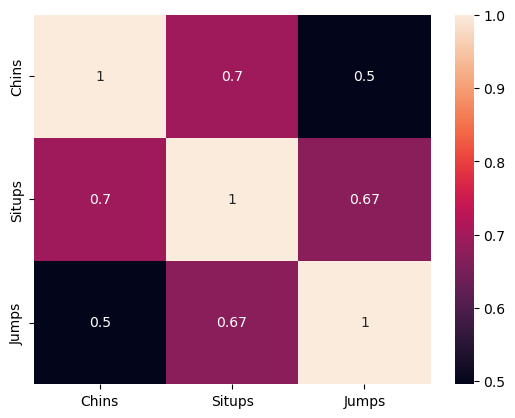

In [41]:
from sklearn.metrics import confusion_matrix
conf_mat_t = train.corr()
sns.heatmap(conf_mat_t, annot =True)

*Statistical Description of Test Dataset*

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  20 non-null     float64
 1   Waist   20 non-null     float64
 2   Pulse   20 non-null     float64
dtypes: float64(3)
memory usage: 612.0 bytes


In [43]:
test.describe()

,Weight,Waist,Pulse
count,20.000000,20.000000,20.000000
mean,178.600000,35.400000,56.100000
std,24.690505,3.201973,7.210373
min,138.000000,31.000000,46.000000
25%,160.750000,33.000000,51.500000
50%,176.000000,35.000000,55.000000
75%,191.500000,37.000000,60.500000
max,247.000000,46.000000,74.000000


<Axes: >

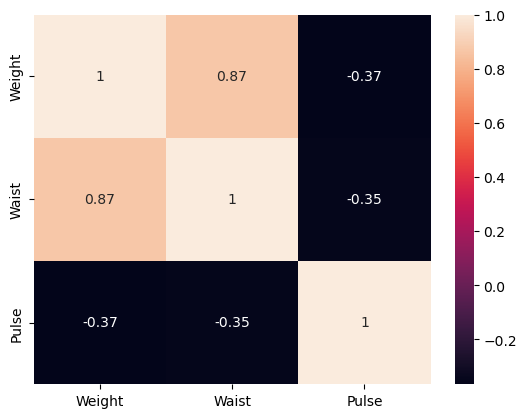

In [44]:
conf_mat_test = test.corr()
sns.heatmap(conf_mat_test, annot = True)

# Subpart 2

In [45]:
test.isna()

,Weight,Waist,Pulse
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [46]:
train.isna().sum()

Chins     0
Situps    0
Jumps     0
dtype: int64

The dataset has no missing Values, and hence no further cleaning is required

# Part 2

In [47]:
print("\033[1mFeature names of Train Dataset \033[0;0m")
for i in train.columns:
    print(i)
print('\n')
print("\033[1mFeature names of Test Dataset \033[0;0m")
for i in test.columns:
    print(i)

Feature names of Train Dataset 
Chins
Situps
Jumps


Feature names of Test Dataset 
Weight
Waist
Pulse


# Part 3

Training a Linear Regression Model

*Using GridSearchCV*

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, test, random_state=42, test_size=0.8)


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
lr = LinearRegression()
pipeline = Pipeline([('ss', ss), ('lr', lr)])
parameters = {
    'lr__fit_intercept' : [True, False],
    'lr__copy_X' : [True, False],
    'lr__n_jobs' : [1, 2, 3, None],
    'lr__positive' : [True, False]
}
gridpipe = GridSearchCV(pipeline, parameters, cv = 3)
gridpipe.fit(X_train, y_train)
print("Grid Search Parameters:", gridpipe.best_params_)
gridpipe_r = RandomizedSearchCV(pipeline, parameters, cv = 3)
gridpipe_r.fit(X_train, y_train)
print("Randomized Search Parameters: ", gridpipe_r.best_estimator_)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn

Grid Search Parameters: {'lr__copy_X': True, 'lr__fit_intercept': True, 'lr__n_jobs': 1, 'lr__positive': True}


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn

Randomized Search Parameters:  Pipeline(steps=[('ss', StandardScaler()),
                ('lr', LinearRegression(fit_intercept=False, n_jobs=3))])


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [50]:
lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, positive=True)
lr.fit(X_train, y_train)
y_prd_lr_gr = lr.predict(X_test)

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
mse = mean_squared_error(y_test, y_prd_lr_gr)
r2 = r2_score(y_test, y_prd_lr_gr)
mae = mean_absolute_error(y_test, y_prd_lr_gr)
msle = mean_squared_log_error(y_test, y_prd_lr_gr)
print("\n\t\t\tUsing GRIDSEARCHCV\t\t\t\n")
print("\n\t\t\tMean Squared Error:", mse, "\t\t\t\n")
print("\n\t\t\tR-squared:", r2, "\t\t\t\n")
print("\n\t\t\tMean Absolute Error:", mae, "\t\t\t\n")
print("\n\t\t\tMean Square Log Error: ", msle, "\t\t\t\n")


			Using GRIDSEARCHCV			


			Mean Squared Error: 2869.8714182561675 			


			R-squared: -50.88480097288153 			


			Mean Absolute Error: 27.26303475935828 			


			Mean Square Log Error:  0.19459691504243704 			



*Using RandomizedSearchCV*

In [52]:
lr = LinearRegression(fit_intercept=False, n_jobs=3, positive=True)
lr.fit(X_train, y_train)
y_prd_lr_gr = lr.predict(X_test)

In [53]:
mse = mean_squared_error(y_test, y_prd_lr_gr)
r2 = r2_score(y_test, y_prd_lr_gr)
mae = mean_absolute_error(y_test, y_prd_lr_gr)
msle = mean_squared_log_error(y_test, y_prd_lr_gr)
print("\n\t\t\tUsing RandomizedSearchCV\t\t\t\n")
print("\n\t\t\tMean Squared Error:", mse, "\t\t\t\n")
print("\n\t\t\tR-squared:", r2, "\t\t\t\n")
print("\n\t\t\tMean Absolute Error:", mae, "\t\t\t\n")
print("\n\t\t\tMean Square Log Error: ", msle, "\t\t\t\n")


			Using RandomizedSearchCV			


			Mean Squared Error: 43662.199653330295 			


			R-squared: -242.08588516438752 			


			Mean Absolute Error: 108.34567122407786 			


			Mean Square Log Error:  0.6693800360084046 			



Training a Ridge Regression Model

In [54]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
rd = Ridge()
pipeline = Pipeline([('ss', ss), ('rd', rd)])
parameters = {
    'rd__copy_X' : [True, False],
    'rd__fit_intercept' : [True, False],
    'rd__solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    'rd__max_iter' : [None, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
}
gridpipe = GridSearchCV(pipeline, parameters, cv = 3)
gridpipe.fit(X_train, y_train)
print("Grid Search Parameters:", gridpipe.best_params_)
gridpipe_r = RandomizedSearchCV(pipeline, parameters, cv = 3)
gridpipe_r.fit(X_train, y_train)
print("Randomized Search Parameters: ", gridpipe_r.best_estimator_)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn

Grid Search Parameters: {'rd__copy_X': True, 'rd__fit_intercept': True, 'rd__max_iter': None, 'rd__solver': 'auto'}
Randomized Search Parameters:  Pipeline(steps=[('ss', StandardScaler()),
                ('rd', Ridge(max_iter=3500, solver='svd'))])


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn

*Using GridSeachCV*

In [55]:
lr = Ridge(copy_X = True, fit_intercept = True, max_iter =  None, solver = 'auto')
lr.fit(X_train, y_train)
y_prd_lr_gr = lr.predict(X_test)

In [56]:
mse = mean_squared_error(y_test, y_prd_lr_gr)
r2 = r2_score(y_test, y_prd_lr_gr)
mae = mean_absolute_error(y_test, y_prd_lr_gr)
msle = mean_squared_log_error(y_test, y_prd_lr_gr)
print("\n\t\t\tUsing GridSearchCV\t\t\t\n")
print("\n\t\t\tMean Squared Error:", mse, "\t\t\t\n")
print("\n\t\t\tR-squared:", r2, "\t\t\t\n")
print("\n\t\t\tMean Absolute Error:", mae, "\t\t\t\n")
print("\n\t\t\tMean Square Log Error: ", msle, "\t\t\t\n")


			Using GridSearchCV			


			Mean Squared Error: 146316.76889983055 			


			R-squared: -393.4100911466092 			


			Mean Absolute Error: 165.5214231945662 			


			Mean Square Log Error:  1.2422502288016566 			



*Using RandomizedSearchCV*

In [57]:
lr = Ridge(max_iter=4000, solver='svd')
lr.fit(X_train, y_train)
y_prd_lr_gr = lr.predict(X_test)

In [65]:
mse = mean_squared_error(y_test, y_prd_lr_gr)
r2 = r2_score(y_test, y_prd_lr_gr)
mae = mean_absolute_error(y_test, y_prd_lr_gr)
msle = mean_squared_log_error(y_test, y_prd_lr_gr)
print("\n\t\t\tUsing RandomizedSearchCV\t\t\t\n")
print("\n\t\t\tMean Squared Error:", mse, "\t\t\t\n")
print("\n\t\t\tR-squared:", r2, "\t\t\t\n")
print("\n\t\t\tMean Absolute Error:", mae, "\t\t\t\n")
print("\n\t\t\tMean Square Log Error: ", msle, "\t\t\t\n")


			Using RandomizedSearchCV			


			Mean Squared Error: 229.44503333333338 			


			R-squared: 0.045386371604615484 			


			Mean Absolute Error: 9.078333333333335 			


			Mean Square Log Error:  0.013293955443171128 			



*Using Non-Linear Models*\
*Using Random Forest Regressor*

In [59]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
ss = StandardScaler()
pipeline = Pipeline([('ss', ss), ('rfr', rfr)])
parameters = {
    'rfr__n_estimators' : [100, 200],
    'rfr__criterion' : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'rfr__max_depth' : [None, 2, 3, 4],
    'rfr__min_samples_split' : [2, 3]
}
gridpipe = GridSearchCV(pipeline, parameters, cv = 3)
gridpipe.fit(X_train, y_train)
print("Grid Search Parameters:", gridpipe.best_params_)
gridpipe_r = RandomizedSearchCV(pipeline, parameters, cv = 3)
gridpipe_r.fit(X_train, y_train)
print("Randomized Search Parameters: ", gridpipe_r.best_estimator_)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn

Grid Search Parameters: {'rfr__criterion': 'squared_error', 'rfr__max_depth': None, 'rfr__min_samples_split': 2, 'rfr__n_estimators': 100}


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn

Randomized Search Parameters:  Pipeline(steps=[('ss', StandardScaler()),
                ('rfr', RandomForestRegressor(max_depth=3))])


*Using GridSearchCV*

In [62]:
rfr = RandomForestRegressor(criterion = 'squared_error', max_depth = None, min_samples_split = 2, n_estimators = 100)
rfr.fit(X_train, y_train)
y_prd_lr_gr = rfr.predict(X_test)

In [63]:
mse = mean_squared_error(y_test, y_prd_lr_gr)
r2 = r2_score(y_test, y_prd_lr_gr)
mae = mean_absolute_error(y_test, y_prd_lr_gr)
msle = mean_squared_log_error(y_test, y_prd_lr_gr)
print("\n\t\t\tUsing GridSearchCV\t\t\t\n")
print("\n\t\t\tMean Squared Error:", mse, "\t\t\t\n")
print("\n\t\t\tR-squared:", r2, "\t\t\t\n")
print("\n\t\t\tMean Absolute Error:", mae, "\t\t\t\n")
print("\n\t\t\tMean Square Log Error: ", msle, "\t\t\t\n")


			Using GridSearchCV			


			Mean Squared Error: 223.7312916666667 			


			R-squared: 0.051599781722839265 			


			Mean Absolute Error: 9.028749999999999 			


			Mean Square Log Error:  0.013257531900959928 			



*Using RandomizedSearchCV*

In [64]:
rfr = RandomForestRegressor(max_depth=3)
rfr.fit(X_train, y_train)
y_prd_lr_gr = rfr.predict(X_test)

In [66]:
mse = mean_squared_error(y_test, y_prd_lr_gr)
r2 = r2_score(y_test, y_prd_lr_gr)
mae = mean_absolute_error(y_test, y_prd_lr_gr)
msle = mean_squared_log_error(y_test, y_prd_lr_gr)
print("\n\t\t\tUsing RandomizedSearchCV\t\t\t\n")
print("\n\t\t\tMean Squared Error:", mse, "\t\t\t\n")
print("\n\t\t\tR-squared:", r2, "\t\t\t\n")
print("\n\t\t\tMean Absolute Error:", mae, "\t\t\t\n")
print("\n\t\t\tMean Square Log Error: ", msle, "\t\t\t\n")


			Using RandomizedSearchCV			


			Mean Squared Error: 229.44503333333338 			


			R-squared: 0.045386371604615484 			


			Mean Absolute Error: 9.078333333333335 			


			Mean Square Log Error:  0.013293955443171128 			



*Using K-Nearest Neighbours Regression*

In [68]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
ss = StandardScaler()
pipeline = Pipeline([('ss', ss), ('knr', knr)])
parameters = {
    'knr__n_neighbors' : [2, 3, 4, 5, 6, 7, 8],
    'knr__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knr__leaf_size' : [30, 40, 50, 60, 70, 80],
    'knr__p' : [1, 2]
}
gridpipe = GridSearchCV(pipeline, parameters, cv = 3)
gridpipe.fit(X_train, y_train)
print("Grid Search Parameters:", gridpipe.best_params_)
gridpipe_r = RandomizedSearchCV(pipeline, parameters, cv = 3)
gridpipe_r.fit(X_train, y_train)
print("Randomized Search Parameters: ", gridpipe_r.best_estimator_)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters 

Grid Search Parameters: {'knr__algorithm': 'auto', 'knr__leaf_size': 30, 'knr__n_neighbors': 2, 'knr__p': 1}


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 753, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 759, in score
    y_pred = self.predict(X)
             ^^^^^^^^^^^^^^^
  File "c

Randomized Search Parameters:  Pipeline(steps=[('ss', StandardScaler()),
                ('knr', KNeighborsRegressor(algorithm='kd_tree'))])


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [69]:
knr = KNeighborsRegressor(algorithm = 'auto', leaf_size =  30, n_neighbors =  2, p =  1)
knr.fit(X_train, y_train)
y_prd_lr_gr = rfr.predict(X_test)

In [70]:
mse = mean_squared_error(y_test, y_prd_lr_gr)
r2 = r2_score(y_test, y_prd_lr_gr)
mae = mean_absolute_error(y_test, y_prd_lr_gr)
msle = mean_squared_log_error(y_test, y_prd_lr_gr)
print("\n\t\t\tUsing GridSearchCV\t\t\t\n")
print("\n\t\t\tMean Squared Error:", mse, "\t\t\t\n")
print("\n\t\t\tR-squared:", r2, "\t\t\t\n")
print("\n\t\t\tMean Absolute Error:", mae, "\t\t\t\n")
print("\n\t\t\tMean Square Log Error: ", msle, "\t\t\t\n")


			Using GridSearchCV			


			Mean Squared Error: 229.44503333333338 			


			R-squared: 0.045386371604615484 			


			Mean Absolute Error: 9.078333333333335 			


			Mean Square Log Error:  0.013293955443171128 			



In [72]:
knr = KNeighborsRegressor(algorithm='kd_tree')
knr.fit(X_train, y_train)
y_prd_lr_gr = rfr.predict(X_test)

In [73]:
mse = mean_squared_error(y_test, y_prd_lr_gr)
r2 = r2_score(y_test, y_prd_lr_gr)
mae = mean_absolute_error(y_test, y_prd_lr_gr)
msle = mean_squared_log_error(y_test, y_prd_lr_gr)
print("\n\t\t\tUsing RandomizedSearchCV\t\t\t\n")
print("\n\t\t\tMean Squared Error:", mse, "\t\t\t\n")
print("\n\t\t\tR-squared:", r2, "\t\t\t\n")
print("\n\t\t\tMean Absolute Error:", mae, "\t\t\t\n")
print("\n\t\t\tMean Square Log Error: ", msle, "\t\t\t\n")


			Using RandomizedSearchCV			


			Mean Squared Error: 229.44503333333338 			


			R-squared: 0.045386371604615484 			


			Mean Absolute Error: 9.078333333333335 			


			Mean Square Log Error:  0.013293955443171128 			



We ran 4 Models on this dataset.\
The Linear models are Linear Regression, Ridge Regression.\
The non-linear Models are Random Forest Regressor and K Nearest Neighbors Regressors.\
The perfomance metrics used to evaluate the performance of the models are Mean Squared Error, R-Squared, Mean-Absolute Error, Mean Square Log Error.